In [1]:
from vnpy.trader.setting import SETTINGS

SETTINGS["database.name"] = "clickhouse"
SETTINGS["database.database"] = "futures"
SETTINGS["database.host"] = "172.19.218.81"
SETTINGS["database.port"] = 9000
SETTINGS["database.user"] = "default"
SETTINGS["database.password"] = "vnpy1234"

In [2]:
from datetime import datetime
from importlib import reload

import pandas as pd
import plotly.express as px

from vnpy.trader.database import get_database
from vnpy.trader.constant import Exchange, Interval
from vnpy.trader.utility import extract_vt_symbol

from vnpy_ctastrategy.backtesting import BacktestingEngine, OptimizationSetting

In [3]:
import rumi_strategy
reload(rumi_strategy)
RumiStrategy = rumi_strategy.RumiStrategy

In [27]:
vt_symbol = "TA99.CZCE"
interval = "1m"
start = datetime(2010, 1, 1)
end = datetime.now()

In [30]:
engine = BacktestingEngine()

engine.set_parameters(
    vt_symbol=vt_symbol,
    interval=interval, 
    start=start, 
    end=end, 
    rate=0.0001,
    slippage=0, 
    size=10, 
    pricetick=1, 
    capital=1_000_000_000
)

setting = {
    "fast_window": 4,
    "slow_window": 140,
    "diff_window": 15
}
engine.add_strategy(RumiStrategy, setting)

2023-01-05 20:56:41.638037	开始加载历史数据
2023-01-05 20:56:41.638037	加载进度：# [0%]
2023-01-05 20:56:41.639054	加载进度：# [10%]
2023-01-05 20:56:41.640092	加载进度：## [20%]
2023-01-05 20:56:41.641118	加载进度：### [30%]
2023-01-05 20:56:41.642136	加载进度：#### [40%]
2023-01-05 20:56:41.644197	加载进度：##### [50%]
2023-01-05 20:56:41.646798	加载进度：###### [60%]
2023-01-05 20:56:41.649843	加载进度：####### [70%]
2023-01-05 20:56:41.652922	加载进度：######## [80%]
2023-01-05 20:56:41.656455	加载进度：######### [90%]
2023-01-05 20:56:41.660517	加载进度：########## [100%]
2023-01-05 20:56:41.660517	历史数据加载完成，数据量：968095
2023-01-05 20:56:41.668793	策略初始化完成
2023-01-05 20:56:41.668793	开始回放历史数据
2023-01-05 20:56:42.205994	回放进度：= [0%]
2023-01-05 20:56:42.697077	回放进度：== [10%]
2023-01-05 20:56:43.256497	回放进度：=== [20%]
2023-01-05 20:56:43.765094	回放进度：==== [30%]
2023-01-05 20:56:44.282817	回放进度：===== [40%]
2023-01-05 20:56:44.791350	回放进度：====== [50%]
2023-01-05 20:56:45.296439	回放进度：======= [60%]
2023-01-05 20:56:45.794643	回放进度：======== [70%]
2023-01-05 20:

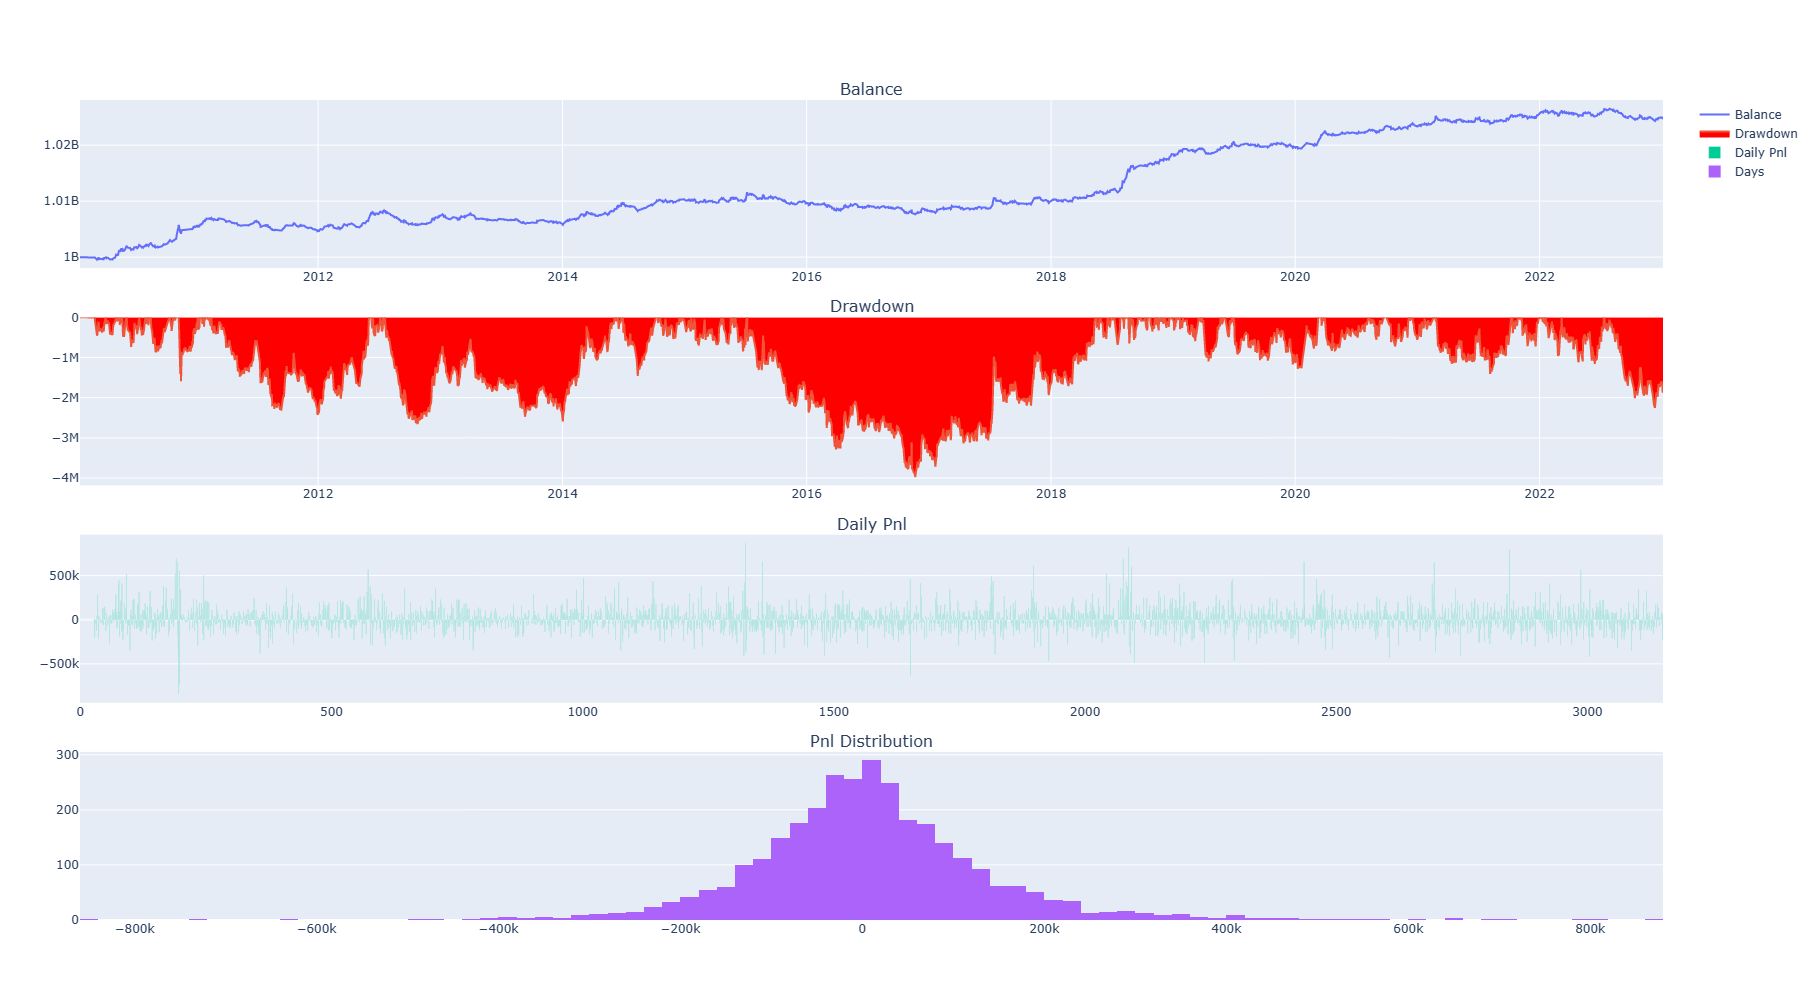

In [31]:
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [23]:
setting = OptimizationSetting()
setting.set_target("end_balance")
setting.add_parameter("fast_window", 2, 30, 2)
setting.add_parameter("slow_window", 50, 200, 10)
setting.add_parameter("diff_window", 5, 100, 5)

engine.run_bf_optimization(setting)

2023-01-05 15:47:24.885801	开始执行穷举算法优化
2023-01-05 15:47:24.885801	参数优化空间：4800


100%|████████████████████████████████████████████████████████████████████████████| 4800/4800 [1:56:17<00:00,  1.45s/it]


2023-01-05 17:43:42.807413	穷举算法优化完成，耗时6977秒
2023-01-05 17:43:44.196986	参数：{'fast_window': 2, 'slow_window': 80, 'diff_window': 50}, 目标：1016803754.2793614
2023-01-05 17:43:44.196986	参数：{'fast_window': 4, 'slow_window': 140, 'diff_window': 15}, 目标：1016216894.286277
2023-01-05 17:43:44.196986	参数：{'fast_window': 14, 'slow_window': 150, 'diff_window': 5}, 目标：1016100596.2547742
2023-01-05 17:43:44.196986	参数：{'fast_window': 6, 'slow_window': 150, 'diff_window': 10}, 目标：1016083459.6494523
2023-01-05 17:43:44.196986	参数：{'fast_window': 12, 'slow_window': 160, 'diff_window': 5}, 目标：1015664409.4197022
2023-01-05 17:43:44.196986	参数：{'fast_window': 2, 'slow_window': 160, 'diff_window': 15}, 目标：1015658073.2925915
2023-01-05 17:43:44.196986	参数：{'fast_window': 10, 'slow_window': 150, 'diff_window': 10}, 目标：1015622849.8579766
2023-01-05 17:43:44.196986	参数：{'fast_window': 16, 'slow_window': 170, 'diff_window': 30}, 目标：1015535388.2119689
2023-01-05 17:43:44.196986	参数：{'fast_window': 2, 'slow_window': 150,

[("{'fast_window': 2, 'slow_window': 80, 'diff_window': 50}",
  1016803754.2793614,
  {'start_date': datetime.date(2017, 1, 17),
   'end_date': datetime.date(2023, 1, 5),
   'total_days': 1452,
   'profit_days': 751,
   'loss_days': 683,
   'capital': 1000000000,
   'end_balance': 1016803754.2793614,
   'max_drawdown': -2597299.362308502,
   'max_ddpercent': -0.25484743626083145,
   'max_drawdown_duration': 152,
   'total_net_pnl': 16803754.279361323,
   'daily_net_pnl': 11572.833525730939,
   'total_commission': 295224.9216387,
   'daily_commission': 203.3229487869835,
   'total_slippage': 0,
   'daily_slippage': 0.0,
   'total_turnover': 2952249216.387,
   'daily_turnover': 2033229.4878698348,
   'total_trade_count': 291,
   'daily_trade_count': 0.20041322314049587,
   'total_return': 1.6803754279361316,
   'annual_return': 0.2777480046175424,
   'daily_return': 0.0011476675713402004,
   'return_std': 0.01530717854523487,
   'sharpe_ratio': 1.1615197085857751,
   'return_drawdown_rat

In [ ]:
db = get_database()

symbol, exchange = extract_vt_symbol(vt_symbol)

bars = db.load_bar_data(
    symbol=symbol,
    exchange=exchange,
    interval=Interval(interval),
    start=start,
    end=end
)

bars[0]

In [ ]:
df = pd.DataFrame.from_dict(bar.__dict__ for bar in bars)
df.set_index("datetime", inplace=True)
df.close_price.plot()

In [ ]:
rb_setting = {
    "fast_window": 2,
    "slow_window": 55,
    "diff_window": 13
}

# cu99.SHFE
# 2023-01-05 02:07:48.336024	参数：{'fast_window': 26, 'slow_window': 120, 'diff_window': 5}, 目标：1018735420.3515621
# 2023-01-05 02:07:48.336024	参数：{'fast_window': 14, 'slow_window': 90, 'diff_window': 10}, 目标：1018372724.5821979
# 2023-01-05 02:07:48.336024	参数：{'fast_window': 18, 'slow_window': 110, 'diff_window': 15}, 目标：1018170472.5076097
# 2023-01-05 02:07:48.336024	参数：{'fast_window': 20, 'slow_window': 120, 'diff_window': 10}, 目标：1017862629.4671539
# 2023-01-05 02:07:48.336024	参数：{'fast_window': 28, 'slow_window': 110, 'diff_window': 5}, 目标：1017213567.2345183



hc99.SHFE
2023-01-05 10:52:19.088775	参数：{'fast_window': 6, 'slow_window': 60, 'diff_window': 10}, 目标：1013606586.6666151
2023-01-05 10:52:19.088775	参数：{'fast_window': 10, 'slow_window': 70, 'diff_window': 5}, 目标：1012502874.0412167
2023-01-05 10:52:19.088775	参数：{'fast_window': 12, 'slow_window': 60, 'diff_window': 5}, 目标：1011981688.3836045
2023-01-05 10:52:19.088775	参数：{'fast_window': 6, 'slow_window': 70, 'diff_window': 10}, 目标：1011622043.0231873
2023-01-05 10:52:19.088775	参数：{'fast_window': 2, 'slow_window': 110, 'diff_window': 90}, 目标：1011449573.7524987
2023-01-05 10:52:19.088775	参数：{'fast_window': 10, 'slow_window': 60, 'diff_window': 5}, 目标：1011323225.3825047
2023-01-05 10:52:19.088775	参数：{'fast_window': 2, 'slow_window': 80, 'diff_window': 15}, 目标：1011271509.7154799
2023-01-05 10:52:19.088775	参数：{'fast_window': 10, 'slow_window': 70, 'diff_window': 10}, 目标：1011084465.9842918
2023-01-05 10:52:19.088775	参数：{'fast_window': 8, 'slow_window': 60, 'diff_window': 10}, 目标：1011025760.799873
2023-01-05 10:52:19.088775	参数：{'fast_window': 4, 'slow_window': 110, 'diff_window': 90}, 目标：1010958715.0648925
2023-01-05 10:52:19.088775	参数：{'fast_window': 4, 'slow_window': 70, 'diff_window': 15}, 目标：1010871302.7180058
2023-01-05 10:52:19.088775	参数：{'fast_window': 6, 'slow_window': 110, 'diff_window': 90}, 目标：1010805029.1484545
2023-01-05 10:52:19.088775	参数：{'fast_window': 10, 'slow_window': 80, 'diff_window': 5}, 目标：1010452398.1227127
2023-01-05 10:52:19.088775	参数：{'fast_window': 14, 'slow_window': 90, 'diff_window': 95}, 目标：1010450547.1738948
2023-01-05 10:52:19.088775	参数：{'fast_window': 2, 'slow_window': 100, 'diff_window': 95}, 目标：1010420931.4852242
2023-01-05 10:52:19.088775	参数：{'fast_window': 4, 'slow_window': 60, 'diff_window': 10}, 目标：1010416746.7323812
2023-01-05 10:52:19.088775	参数：{'fast_window': 8, 'slow_window': 70, 'diff_window': 10}, 目标：1010392716.4034522
2023-01-05 10:52:19.088775	参数：{'fast_window': 12, 'slow_window': 90, 'diff_window': 95}, 目标：1010362833.3127038
2023-01-05 10:52:19.088775	参数：{'fast_window': 2, 'slow_window': 70, 'diff_window': 15}, 目标：1010356912.4803389
2023-01-05 10:52:19.088775	参数：{'fast_window': 12, 'slow_window': 70, 'diff_window': 5}, 目标：1010350493.0425195
2023-01-05 10:52:19.088775	参数：{'fast_window': 2, 'slow_window': 90, 'diff_window': 15}, 目标：1010347616.7354045
2023-01-05 10:52:19.088775	参数：{'fast_window': 20, 'slow_window': 110, 'diff_window': 80}, 目标：1010300861.6157066
2023-01-05 10:52:19.088775	参数：{'fast_window': 4, 'slow_window': 60, 'diff_window': 15}, 目标：1010276162.3551211


CF.CZCE
16, 190, 10


TA.CZCE
2023-01-05 17:43:42.807413	穷举算法优化完成，耗时6977秒
2023-01-05 17:43:44.196986	参数：{'fast_window': 2, 'slow_window': 80, 'diff_window': 50}, 目标：1016803754.2793614
## 2023-01-05 17:43:44.196986	参数：{'fast_window': 4, 'slow_window': 140, 'diff_window': 15}, 目标：1016216894.286277
2023-01-05 17:43:44.196986	参数：{'fast_window': 14, 'slow_window': 150, 'diff_window': 5}, 目标：1016100596.2547742
2023-01-05 17:43:44.196986	参数：{'fast_window': 6, 'slow_window': 150, 'diff_window': 10}, 目标：1016083459.6494523
2023-01-05 17:43:44.196986	参数：{'fast_window': 12, 'slow_window': 160, 'diff_window': 5}, 目标：1015664409.4197022
2023-01-05 17:43:44.196986	参数：{'fast_window': 2, 'slow_window': 160, 'diff_window': 15}, 目标：1015658073.2925915
2023-01-05 17:43:44.196986	参数：{'fast_window': 10, 'slow_window': 150, 'diff_window': 10}, 目标：1015622849.8579766
2023-01-05 17:43:44.196986	参数：{'fast_window': 16, 'slow_window': 170, 'diff_window': 30}, 目标：1015535388.2119689
2023-01-05 17:43:44.196986	参数：{'fast_window': 2, 'slow_window': 150, 'diff_window': 15}, 目标：1015389944.6065732
2023-01-05 17:43:44.196986	参数：{'fast_window': 12, 'slow_window': 160, 'diff_window': 40}, 目标：1015057010.0677356
2023-01-05 17:43:44.196986	参数：{'fast_window': 4, 'slow_window': 150, 'diff_window': 15}, 目标：1014916644.3688902
2023-01-05 17:43:44.196986	参数：{'fast_window': 24, 'slow_window': 110, 'diff_window': 55}, 目标：1014908758.9556892
2023-01-05 17:43:44.196986	参数：{'fast_window': 6, 'slow_window': 160, 'diff_window': 10}, 目标：1014877372.6191653
2023-01-05 17:43:44.196986	参数：{'fast_window': 10, 'slow_window': 150, 'diff_window': 5}, 目标：1014847416.2982619
2023-01-05 17:43:44.196986	参数：{'fast_window': 2, 'slow_window': 170, 'diff_window': 15}, 目标：1014768281.5917836
2023-01-05 17:43:44.196986	参数：{'fast_window': 6, 'slow_window': 120, 'diff_window': 15}, 目标：1014728807.293262
2023-01-05 17:43:44.196986	参数：{'fast_window': 28, 'slow_window': 80, 'diff_window': 70}, 目标：1014639691.174806
2023-01-05 17:43:44.196986	参数：{'fast_window': 24, 'slow_window': 170, 'diff_window': 20}, 目标：1014619446.5374064
2023-01-05 17:43:44.196986	参数：{'fast_window': 14, 'slow_window': 140, 'diff_window': 5}, 目标：1014592204.2918833
2023-01-05 17:43:44.196986	参数：{'fast_window': 16, 'slow_window': 120, 'diff_window': 5}, 目标：1014548203.4425346
2023-01-05 17:43:44.196986	参数：{'fast_window': 28, 'slow_window': 100, 'diff_window': 55}, 目标：1014538014.2260449
2023-01-05 17:43:44.196986	参数：{'fast_window': 4, 'slow_window': 90, 'diff_window': 35}, 目标：1014504588.5678059
2023-01-05 17:43:44.196986	参数：{'fast_window': 2, 'slow_window': 110, 'diff_window': 30}, 目标：1014499710.2348702
2023-01-05 17:43:44.196986	参数：{'fast_window': 4, 'slow_window': 70, 'diff_window': 80}, 目标：1014431016.4195876
2023-01-05 17:43:44.196986	参数：{'fast_window': 22, 'slow_window': 100, 'diff_window': 60}, 目标：1014412994.696983
2023-01-05 17:43:44.196986	参数：{'fast_window': 24, 'slow_window': 100, 'diff_window': 65}, 目标：1014408404.589245
2023-01-05 17:43:44.196986	参数：{'fast_window': 26, 'slow_window': 90, 'diff_window': 60}, 目标：1014380632.1872787
2023-01-05 17:43:44.196986	参数：{'fast_window': 2, 'slow_window': 160, 'diff_window': 5}, 目标：1014338594.1470923
2023-01-05 17:43:44.196986	参数：{'fast_window': 30, 'slow_window': 140, 'diff_window': 60}, 目标：1014254852.5929663
2023-01-05 17:43:44.196986	参数：{'fast_window': 8, 'slow_window': 120, 'diff_window': 70}, 目标：1014191994.8223866
2023-01-05 17:43:44.196986	参数：{'fast_window': 10, 'slow_window': 190, 'diff_window': 5}, 目标：1014188477.050778
2023-01-05 17:43:44.196986	参数：{'fast_window': 10, 'slow_window': 160, 'diff_window': 25}, 目标：1014174456.0957642
2023-01-05 17:43:44.196986	参数：{'fast_window': 12, 'slow_window': 140, 'diff_window': 10}, 目标：1014170488.8391216
2023-01-05 17:43:44.196986	参数：{'fast_window': 30, 'slow_window': 150, 'diff_window': 15}, 目标：1014168040.7554779
2023-01-05 17:43:44.196986	参数：{'fast_window': 14, 'slow_window': 170, 'diff_window': 20}, 目标：1014149678.6831088
2023-01-05 17:43:44.196986	参数：{'fast_window': 18, 'slow_window': 90, 'diff_window': 65}, 目标：1014132391.1867293
2023-01-05 17:43:44.196986	参数：{'fast_window': 16, 'slow_window': 150, 'diff_window': 5}, 目标：1014101670.539784
2023-01-05 17:43:44.196986	参数：{'fast_window': 24, 'slow_window': 120, 'diff_window': 75}, 目标：1014083131.2546487